**Data Science - Regressão Linear**

In [0]:
import pandas as pd
import numpy as np

In [0]:
import warnings 
warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

**O Dataset e o Projeto**
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo neste projeto é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vou utilizar um dataset disponível no Kaggle. Este dataset foi modificado para facilitar o objetivo, que é treinamento de Regressão Linear.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

**Leitura dos dados**



In [0]:
dados = pd.read_csv('HousePrices_HalfMil.csv', sep=',')

## Visualizar os dados

In [75]:
dados

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,128,3,4,2,1,0,0,1,2,0,1,0,1,1,1,55900
499996,30,2,4,5,0,0,1,0,1,0,0,1,0,0,1,29250
499997,174,3,3,2,0,1,0,1,1,1,1,1,0,1,0,51350
499998,121,1,4,5,0,1,0,1,3,0,1,1,1,0,0,62725


In [32]:
dados.shape

(500000, 16)

**Estatísticas descritivas**

In [78]:
dados.describe().round(2)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.0,500000.00,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.00
mean,124.93,2.00,2.00,3.00,0.33,0.33,0.33,0.5,2.00,0.5,0.5,0.5,0.5,0.5,0.5,42050.14
std,71.80,0.82,1.41,1.41,0.47,0.47,0.47,0.5,0.82,0.5,0.5,0.5,0.5,0.5,0.5,12110.24
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,7725.00
25%,63.00,1.00,1.00,2.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,33500.00
50%,125.00,2.00,2.00,3.00,0.00,0.00,0.00,0.0,2.00,0.0,1.0,1.0,0.0,1.0,1.0,41850.00
75%,187.00,3.00,3.00,4.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,50750.00
max,249.00,3.00,4.00,5.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,77975.00


**Matriz de correlação** 

O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

**Observe as correlações entre as variáveis:**


 

*   Quais são mais correlacionadas com a variável dependente (Preço)?

*   Qual o relacionamento entre elas (positivo ou negativo)?
*   Existe correlação forte entre as variáveis explicativas?




In [79]:
dados.corr().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.0000,-0.0009,0.0004,-0.0004,0.0025,-0.0015,-0.0010,-0.0008,-0.0035,0.0005,-0.0001,0.0001,-0.0012,0.0006,0.0014,0.1477
Garage,-0.0009,1.0000,0.0013,-0.0036,0.0005,0.0018,-0.0024,-0.0009,0.0008,0.0015,0.0008,-0.0006,-0.0022,0.0011,-0.0007,0.1003
FirePlace,0.0004,0.0013,1.0000,0.0006,0.0010,-0.0009,-0.0000,0.0002,-0.0002,-0.0003,0.0013,0.0018,-0.0004,0.0013,0.0002,0.0891
Baths,-0.0004,-0.0036,0.0006,1.0000,0.0025,-0.0027,0.0002,-0.0009,-0.0009,-0.0008,0.0010,-0.0007,-0.0017,0.0022,0.0017,0.1451
White Marble,0.0025,0.0005,0.0010,0.0025,1.0000,-0.4989,-0.5007,0.0001,-0.0009,-0.0016,0.0006,-0.0006,-0.0004,-0.0019,0.0010,0.4482
Black Marble,-0.0015,0.0018,-0.0009,-0.0027,-0.4989,1.0000,-0.5004,-0.0004,-0.0003,0.0018,-0.0005,0.0001,0.0001,0.0007,0.0001,-0.0780
Indian Marble,-0.0010,-0.0024,-0.0000,0.0002,-0.5007,-0.5004,1.0000,0.0003,0.0012,-0.0002,-0.0000,0.0005,0.0003,0.0012,-0.0011,-0.3698
Floors,-0.0008,-0.0009,0.0002,-0.0009,0.0001,-0.0004,0.0003,1.0000,-0.0006,-0.0027,0.0001,0.0014,-0.0000,-0.0002,-0.0005,0.6195
City,-0.0035,0.0008,-0.0002,-0.0009,-0.0009,-0.0003,0.0012,-0.0006,1.0000,0.0005,0.0008,-0.0027,0.0008,0.0003,0.0012,0.2333
Solar,0.0005,0.0015,-0.0003,-0.0008,-0.0016,0.0018,-0.0002,-0.0027,0.0005,1.0000,0.0019,0.0002,-0.0008,-0.0005,-0.0043,0.0084


# <font color='blue' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)**bold text**</font><hr style='border: 2px solid blue;'>

# Análises gráficas

In [0]:
import seaborn as sns

In [0]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

**Box plot da variável dependente (y)**


Avaliando o comportamento da distribuição da variável dependente:

Parecem existir valores discrepantes (outliers)?

O box plot apresenta alguma tendência?


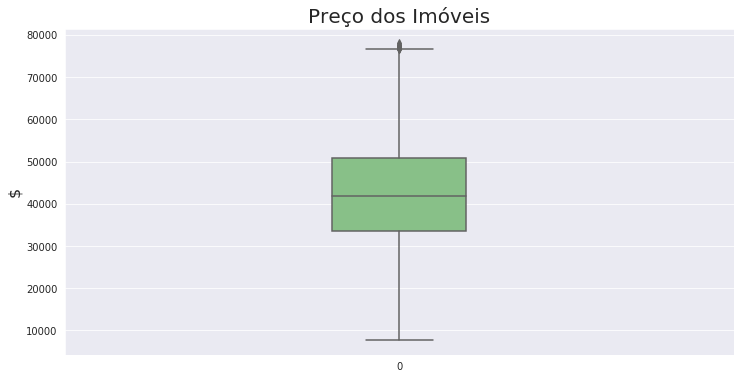

In [41]:
ax = sns.boxplot(data=dados['Prices'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax

**Investigando a variável dependente (y) juntamente com outras característica**
 

Fazendo um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:

    As estatísticas apresentam mudança significativa entre as categorias?
    O box plot apresenta alguma tendência bem definida?

**Box-plot(Preço X Garagem)**

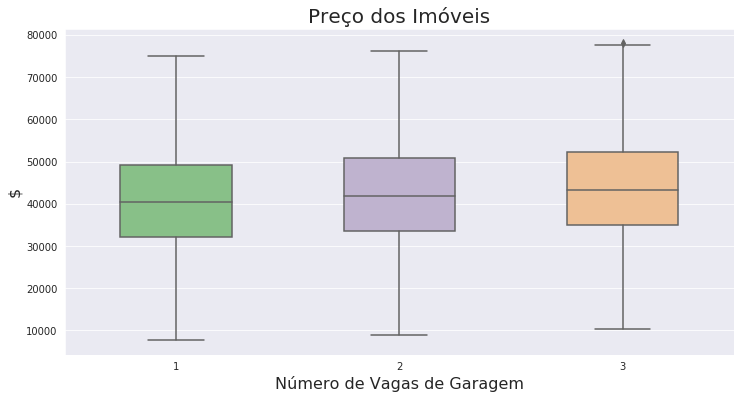

In [58]:
ax = sns.boxplot(y='Prices', x='Garage', data=dados, orient='v' , width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Vagas de Garagem', fontsize=16)
ax

**Box-plot(Preço x Banheiros)**

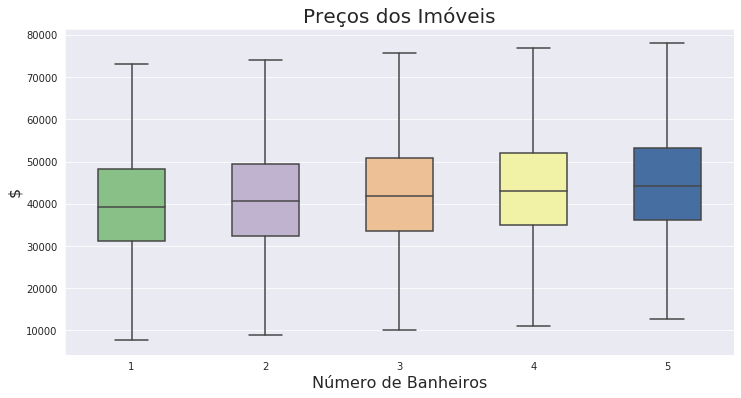

In [61]:
ax = sns.boxplot(y='Prices', x='Baths', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Banheiros', fontsize=16)
ax

**Box-plot (Preço X Lareira)**

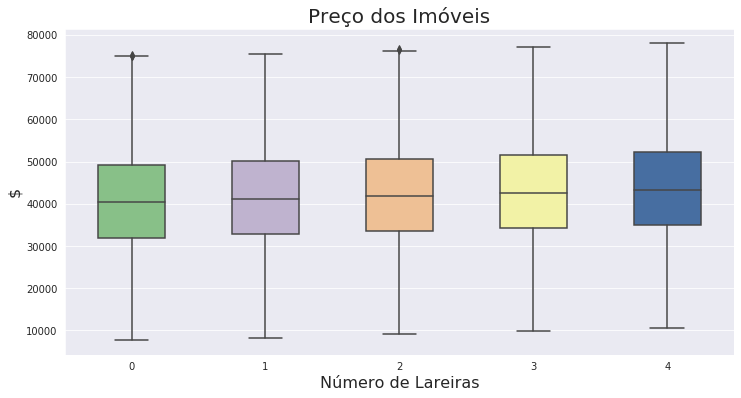

In [63]:
ax = sns.boxplot(y='Prices', x='FirePlace', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Lareiras', fontsize=16)
ax

**Box-plot (Preço X Acabamento em Mármore)**

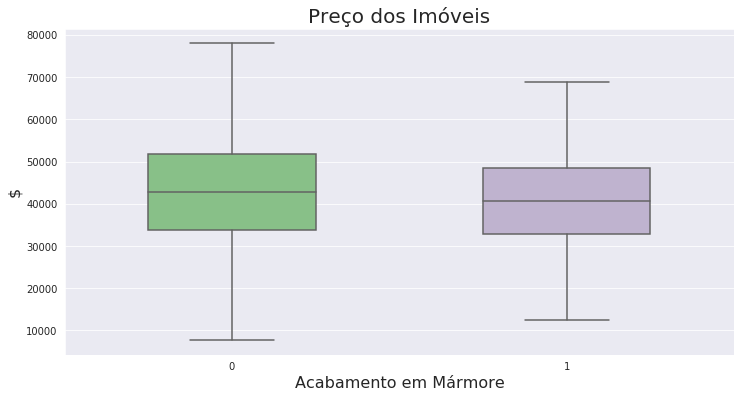

In [83]:
ax = sns.boxplot(y='Prices', x='Black Marble', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabamento em Mármore', fontsize=16)
ax

**Box-plot (Preço X Andares)**

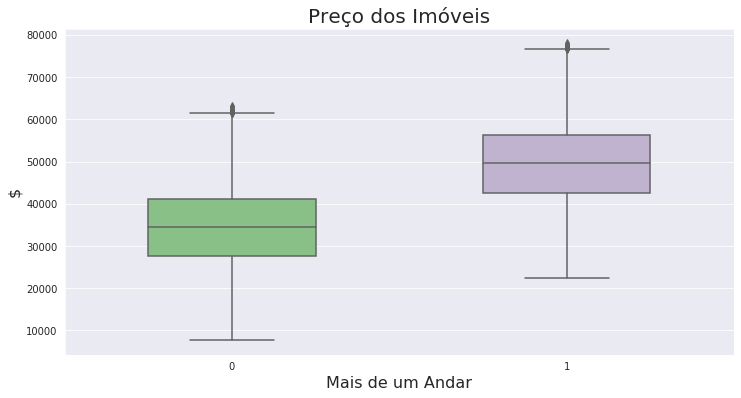

In [84]:
ax = sns.boxplot(y='Prices', x='Floors', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Mais de um Andar', fontsize=16)
ax

**Distribuição de frequências da variável dependente (y)**

Construção de um histograma da variável dependente (Preço).

**Avaliando:**



*   A distribuição de frequências da variável dependente parece ser assimétrica?
*   É possível supor que a variável dependente segue uma distribuição normal?



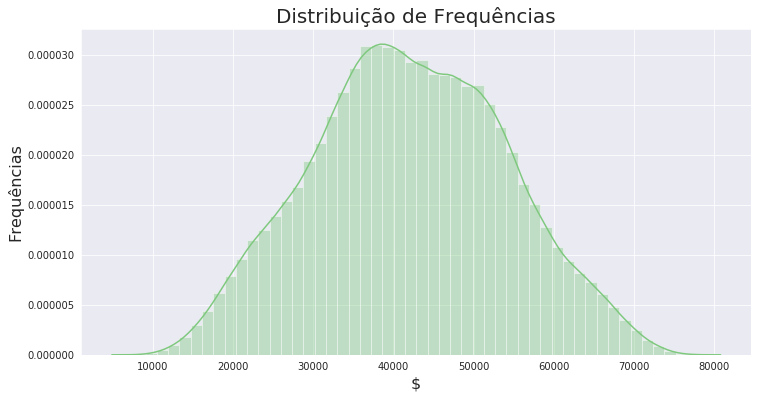

In [85]:
ax = sns.distplot(dados['Prices'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax

**Gráficos de dispersão entre as variáveis do dataset**

**Plotando o pairplot fixando somente uma variável no eixo y**

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

**Avaliando:**



*   É possível identificar alguma relação linear entre as variáveis?
*   A relação é positiva ou negativa?
*   Compare com os resultados obtidos na matriz de correlação.







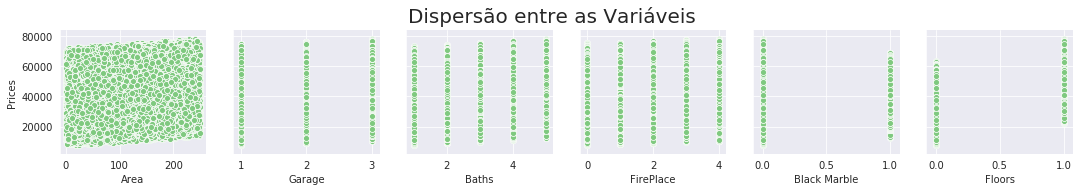

In [90]:
ax = sns.pairplot(dados, y_vars='Prices', x_vars=['Area','Garage', 'Baths', 'FirePlace', 'Black Marble', 'Floors'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

**Importando o *train_test_split* da biblioteca *scikit-learn***

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split

**Criando uma Series (pandas) para armazenar a variável dependente (y)**

In [0]:
y = dados['Prices']

**Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)**

In [0]:
X = dados[['Area', 'Garage', 'Baths', 'FirePlace', 'Black Marble', 'Floors']]

**Criando os datasets de treino e de teste**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

**Importando LinearRegression e metrics da biblioteca scikit-learn**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Instanciando a classe LinearRegression()**

In [0]:
modelo = LinearRegression()

**Utilizando o método fit() para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [104]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Avalie:

O modelo apresenta um bom ajuste?

Você lembra o que representa o R²?

Qual medida podemos tomar para melhorar essa estatística?

In [105]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.45


**Gerando previsões para os dados de TESTE (X_test) utilizando o método predict()**

In [0]:
y_previsto = modelo.predict(X_test)

**Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo**

In [109]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.45


**Criando um simulador simples**

Criando um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [111]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 50822.08


## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

```
# This is formatted as code
```




**Obtendo métricas para o modelo com Temperatura Máxima**

In [112]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,80546639.99
REQM,8974.78
R²,0.45


**Salvando e Carregando o Modelo Estimado**

Importando a biblioteca pickle

In [0]:
import pickle

**Salvando o modelo estimado**

In [0]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()

In [115]:
modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

$ 50822.08
